<a href="https://colab.research.google.com/github/errec-sun/brain/blob/master/ALL_of_%D0%A4%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_Pro_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_3_%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание изображений из набора данных MNIST и CIFAR-10 с помощью свёрточный нейронных сетей

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

#Подготовка данных
Подключение библиотек

In [1]:
from keras.datasets import mnist #Загружаем базу mnist
from keras.datasets import cifar10 #Загружаем базу cifar10
from keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточный сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений

Using TensorFlow backend.


Загрузка данных

In [2]:
#Загружаем все базы
(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()
(x_train100, y_train100), (x_test100, y_test100) = cifar100.load_data()

#задаём заранее batch_size для сетей
batch_size = 128
#Загружаем названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

#Превращаем выходы сетей в формат  one hot encoding
y_train = utils.to_categorical(y_train, 10)
y_train10 = utils.to_categorical(y_train10, 10)
y_train100 = utils.to_categorical(y_train100, 100)

#Меняем формат данных mnist
#Надо добавить в конце размерность 1
#Чтобы свёрточная сеть понимала, что это чёрно-белые данные
#У cifat10 последняя размерность 3 - цветные данные, формат rgb, три цвета
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

169009152/169001437 [==============================] - 6s 0us/step


Отображение картинки на выбор

лягушка


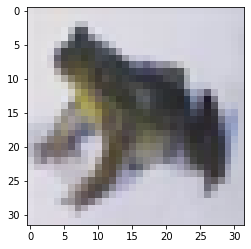

In [3]:
#Выводим для примера картинку
n = 2019
#Загружаем картинку из массива и отрисовываем в цветном формате - RGBA
print(classes[np.argmax(y_train10[n])])
plt.imshow(Image.fromarray(x_train10[n]).convert('RGBA'))
plt.show()

In [4]:
#Выводим пример картинки в цифрах, как она хранится в памяти
print(x_train10[n, 0, 0])

[225 223 226]


In [5]:
print(x_train10.shape)
print(x_test10.shape)
print(x_train.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(60000, 28, 28, 1)


#Нейронные сети
Базовая архитектура свёрточной сети для работы с набором MNIST

In [0]:
#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Распознавание случайной картинки из тестового набора

In [0]:
#Распознаём все тестовые картинки
prediction = model.predict(x_test10)

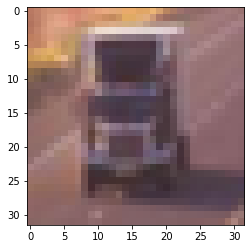

Выход сети:  [1.2751598e-02 5.7523367e-03 4.5353998e-03 2.4511163e-01 1.4565428e-04
 5.8854315e-03 5.6513494e-05 5.8947587e-03 1.9660741e-02 7.0020586e-01]
Распознанный образ:  9
Верный ответ:  [9]
Распознанный браз на картинке:  грузовик


In [0]:
#Выбираем номер пример
n = 2027

#Выводим на экран картинку
plt.imshow(Image.fromarray(x_test10[n]).convert('RGBA'))
plt.show()

#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test10[n])
print("Распознанный браз на картинке: ", classes[np.argmax(prediction[n])])

#Распознаем дополнительные картинки

In [0]:
#Загружаем свою картинку
files.upload()
#Проверяем, что картинка загрузилась
!ls

Saving friends.jpg to friends.jpg
airplane_12.jpg  airplane_1.jpg  friends.jpg  sample_data


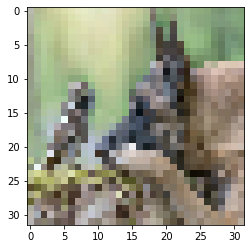

In [0]:
#Вводим адрес картинки
img_path = 'friends.jpg'
#Загружаем картинку в массив
img = image.load_img(img_path, target_size=(32, 32))
#Отрисовываем картинку
plt.imshow(img)
plt.show()

In [0]:
#переводим картинку в массив
x = image.img_to_array(img)
#Добавляем одну размерность для предсказания
x = np.expand_dims(x, axis=0)
#Распознаём класс картинки
prediction = model.predict(x)
prediction = np.argmax(prediction)
#Вводим результаты на экран
print("Распознанный образ: ", prediction)
print("Название распознанного образа: ", classes[prediction])

Распознанный образ:  4
Название распознанного образа:  олень


#Свёрточная сеть на Mnist

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 57us/sample - loss: 0.1688 - acc: 0.9479 - val_loss: 0.0555 - val_acc: 0.9832
Epoch 2/20
48000/48000 [==============================] - 2s 51us/sample - loss: 0.0553 - acc: 0.9833 - val_loss: 0.0447 - val_acc: 0.9860
Epoch 3/20
48000/48000 [==============================] - 2s 50us/sample - loss: 0.0391 - acc: 0.9871 - val_loss: 0.0379 - val_acc: 0.9885
Epoch 4/20
48000/48000 [==============================] - 2s 50us/sample - loss: 0.0292 - acc: 0.9908 - val_loss: 0.0404 - val_acc: 0.9871
Epoch 5/20
48000/48000 [==============================] - 2s 50us/sample - loss: 0.0235 - acc: 0.9919 - val_loss: 0.0360 - val_acc: 0.9901
Epoch 6/20
48000/48000 [==============================] - 2s 51us/sample - loss: 0.0204 - acc: 0.9928 - val_loss: 0.0434 - val_acc: 0.9874
Epoch 7/20
48000/48000 [==============================] - 2s 51us/sample - loss: 0.0160 - acc: 0.9944 - val_loss: 0.

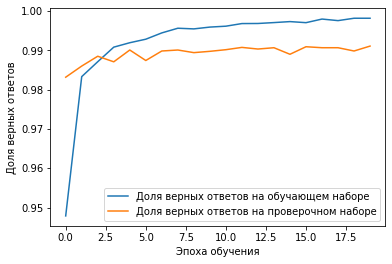

In [0]:
#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(28, 28, 1)))
#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(256, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

#Отображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Распознавание случайной цифры из тестового набора

In [0]:
#Выбираем номер пример
n = 2022
#Получаем выход сети на этом примере
prediction = model.predict(x_test)

#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанная цифра: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test[n])

Выход сети:  [4.0197112e-27 7.6274708e-17 1.9672122e-21 3.8941829e-26 1.0000000e+00
 2.4598634e-20 9.5716082e-21 1.1076239e-18 4.5066607e-18 4.7698182e-17]
Распознанная цифра:  4
Верный ответ:  4


#Разные архитектуры

- Ядро свёртки первого слоя - 7, 7
- MaxPooling слои 4, 4 вместо базовых 2, 2

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 9s 237us/sample - loss: 1.6170 - acc: 0.4061 - val_loss: 1.3013 - val_acc: 0.5377
Epoch 2/20
40000/40000 [==============================] - 9s 218us/sample - loss: 1.2524 - acc: 0.5488 - val_loss: 1.1256 - val_acc: 0.6019
Epoch 3/20
40000/40000 [==============================] - 9s 218us/sample - loss: 1.0981 - acc: 0.6081 - val_loss: 0.9663 - val_acc: 0.6555
Epoch 4/20
40000/40000 [==============================] - 9s 218us/sample - loss: 1.0119 - acc: 0.6407 - val_loss: 0.9065 - val_acc: 0.6844
Epoch 5/20
40000/40000 [==============================] - 9s 218us/sample - loss: 0.9346 - acc: 0.6678 - val_loss: 0.8484 - val_acc: 0.7025
Epoch 6/20
40000/40000 [==============================] - 9s 220us/sample - loss: 0.8810 - acc: 0.6881 - val_loss: 0.8389 - val_acc: 0.7028
Epoch 7/20
40000/40000 [==============================] - 9s 219us/sample - loss: 0.8354 - acc: 0.7033 - val_l

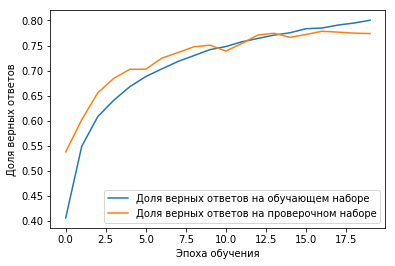

In [0]:
# Создаем последовательную модель
model = Sequential()
# Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
# Первый сверточный слой
model.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(4, 4)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Слой пакетной нормализации
model.add(BatchNormalization())
# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируемсеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

#Выводим график обучения сети
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Отключение MaxPooling слоёв**

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 29s 734us/sample - loss: 2.1852 - acc: 0.2582 - val_loss: 1.6288 - val_acc: 0.4083
Epoch 2/20
40000/40000 [==============================] - 29s 721us/sample - loss: 1.4989 - acc: 0.4558 - val_loss: 1.2928 - val_acc: 0.5286
Epoch 3/20
40000/40000 [==============================] - 29s 724us/sample - loss: 1.2963 - acc: 0.5306 - val_loss: 1.2193 - val_acc: 0.5611
Epoch 4/20
40000/40000 [==============================] - 29s 727us/sample - loss: 1.1261 - acc: 0.5950 - val_loss: 1.0674 - val_acc: 0.6186
Epoch 5/20
40000/40000 [==============================] - 29s 723us/sample - loss: 0.9890 - acc: 0.6474 - val_loss: 1.0723 - val_acc: 0.6291
Epoch 6/20
40000/40000 [==============================] - 29s 722us/sample - loss: 0.8537 - acc: 0.6947 - val_loss: 0.9877 - val_acc: 0.6590
Epoch 7/20
40000/40000 [==============================] - 29s 724us/sample - loss: 0.7258 - acc: 0.7404 

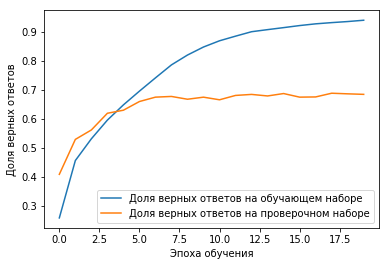

In [0]:
# Создаем последовательную модель
model = Sequential()
# Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Слой пакетной нормализации
model.add(BatchNormalization())
# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Отключение BatchNormalization слоёв**

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 9s 216us/sample - loss: 2.5957 - acc: 0.2457 - val_loss: 1.6578 - val_acc: 0.4178
Epoch 2/20
40000/40000 [==============================] - 8s 198us/sample - loss: 1.6453 - acc: 0.4028 - val_loss: 1.4195 - val_acc: 0.4886
Epoch 3/20
40000/40000 [==============================] - 8s 195us/sample - loss: 1.4871 - acc: 0.4607 - val_loss: 1.3459 - val_acc: 0.5251
Epoch 4/20
40000/40000 [==============================] - 8s 199us/sample - loss: 1.3853 - acc: 0.5049 - val_loss: 1.2108 - val_acc: 0.5728
Epoch 5/20
40000/40000 [==============================] - 8s 201us/sample - loss: 1.3119 - acc: 0.5350 - val_loss: 1.1541 - val_acc: 0.5959
Epoch 6/20
40000/40000 [==============================] - 8s 202us/sample - loss: 1.2352 - acc: 0.5626 - val_loss: 1.0840 - val_acc: 0.6215
Epoch 7/20
40000/40000 [==============================] - 8s 199us/sample - loss: 1.1834 - acc: 0.5807 - val_l

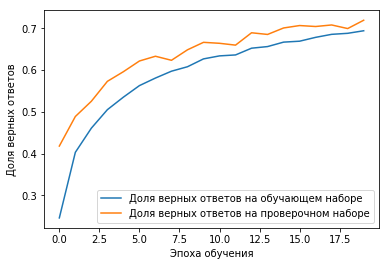

In [0]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (7, 7), input_shape=(32, 32, 3), padding='same', activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(4, 4)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Укороченная сеть, только один блок из двух 32 свёрточных слоёв, отключен второй блок из двух 64 свёрточных слоёв**

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 7s 186us/sample - loss: 1.8191 - acc: 0.3292 - val_loss: 1.4458 - val_acc: 0.4900
Epoch 2/20
40000/40000 [==============================] - 7s 176us/sample - loss: 1.5249 - acc: 0.4426 - val_loss: 1.2952 - val_acc: 0.5496
Epoch 3/20
40000/40000 [==============================] - 7s 174us/sample - loss: 1.4090 - acc: 0.4900 - val_loss: 1.1867 - val_acc: 0.5887
Epoch 4/20
40000/40000 [==============================] - 7s 166us/sample - loss: 1.3339 - acc: 0.5151 - val_loss: 1.1072 - val_acc: 0.6133
Epoch 5/20
40000/40000 [==============================] - 7s 167us/sample - loss: 1.2746 - acc: 0.5421 - val_loss: 1.0933 - val_acc: 0.6216
Epoch 6/20
40000/40000 [==============================] - 7s 169us/sample - loss: 1.2398 - acc: 0.5541 - val_loss: 1.0625 - val_acc: 0.6289
Epoch 7/20
40000/40000 [==============================] - 7s 169us/sample - loss: 1.2059 - acc: 0.5669 - val_l

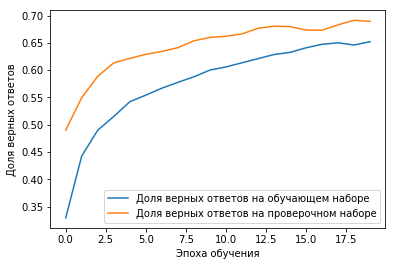

In [0]:
# Создаем последовательную модель
model = Sequential()
# Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
# Первый сверточный слой
model.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(4, 4)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(64, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 3s 76us/sample - loss: 1.6374 - acc: 0.3917 - val_loss: 1.5254 - val_acc: 0.4552
Epoch 2/20
40000/40000 [==============================] - 3s 66us/sample - loss: 1.2845 - acc: 0.5351 - val_loss: 1.1238 - val_acc: 0.5996
Epoch 3/20
40000/40000 [==============================] - 3s 67us/sample - loss: 1.1402 - acc: 0.5926 - val_loss: 1.0212 - val_acc: 0.6371
Epoch 4/20
40000/40000 [==============================] - 3s 67us/sample - loss: 1.0445 - acc: 0.6268 - val_loss: 0.9224 - val_acc: 0.6711
Epoch 5/20
40000/40000 [==============================] - 3s 66us/sample - loss: 0.9793 - acc: 0.6505 - val_loss: 0.9167 - val_acc: 0.6813
Epoch 6/20
40000/40000 [==============================] - 3s 67us/sample - loss: 0.9295 - acc: 0.6723 - val_loss: 0.8558 - val_acc: 0.6970
Epoch 7/20
40000/40000 [==============================] - 3s 67us/sample - loss: 0.8883 - acc: 0.6855 - val_loss: 0.

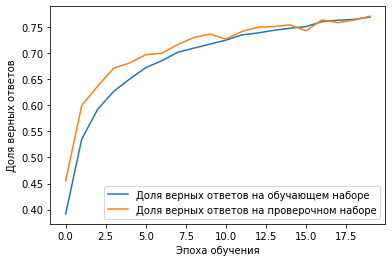

In [0]:
# Создаем последовательную модель
model = Sequential()
# Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Слой пакетной нормализации
model.add(BatchNormalization())
# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируемсеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

#Выводим график обучения сети
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 3s 66us/sample - loss: 0.6498 - acc: 0.7695 - val_loss: 0.6935 - val_acc: 0.7591
Epoch 2/40
40000/40000 [==============================] - 3s 67us/sample - loss: 0.6399 - acc: 0.7743 - val_loss: 0.7001 - val_acc: 0.7579
Epoch 3/40
40000/40000 [==============================] - 3s 66us/sample - loss: 0.6347 - acc: 0.7745 - val_loss: 0.6801 - val_acc: 0.7610
Epoch 4/40
40000/40000 [==============================] - 3s 66us/sample - loss: 0.6278 - acc: 0.7785 - val_loss: 0.6641 - val_acc: 0.7709
Epoch 5/40
40000/40000 [==============================] - 3s 66us/sample - loss: 0.6129 - acc: 0.7847 - val_loss: 0.6744 - val_acc: 0.7671
Epoch 6/40
40000/40000 [==============================] - 3s 66us/sample - loss: 0.6167 - acc: 0.7814 - val_loss: 0.6534 - val_acc: 0.7720
Epoch 7/40
40000/40000 [==============================] - 3s 67us/sample - loss: 0.6092 - acc: 0.7839 - val_loss: 0.

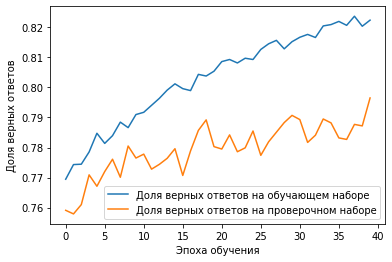

In [0]:
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=40,
                    validation_split=0.2,
                    verbose=1)

#Выводим график обучения сети
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()